In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [13]:

df = pd.read_csv('HPQ.csv')





X = np.array(df.index).reshape(-1, 1) 
y = df['Close']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [14]:

model = LinearRegression()


model.fit(X_train, y_train)


LinearRegression()

In [15]:

next_month_index = X[-1][0] + 1  
next_month_prediction = model.predict([[next_month_index]])

print(f"Predicted value for next month: {next_month_prediction[0]}")


Predicted value for next month: 30.5158843556585


In [16]:

accuracy = model.score(X_test, y_test)
print(f"Model accuracy: {accuracy}")


Model accuracy: 0.07627191159553048


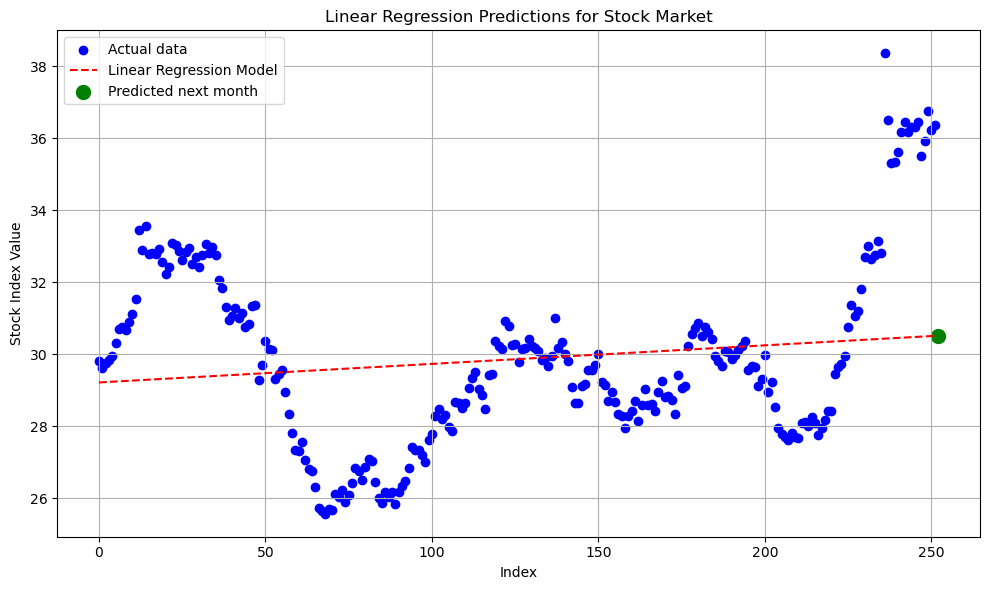

In [17]:

X_plot = np.arange(len(X) + 1).reshape(-1, 1)


predictions = model.predict(X_plot)


plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X_plot, predictions, color='red', linestyle='--', label='Linear Regression Model')
plt.scatter(next_month_index, next_month_prediction, color='green', marker='o', s=100, label='Predicted next month')

plt.title('Linear Regression Predictions for Stock Market')
plt.xlabel('Index')
plt.ylabel('Stock Index Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:


from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [19]:

df = pd.read_csv('HPQ.csv')


X = np.array(df.index).reshape(-1, 1) 
y = df['Close']


In [20]:

degree = 3


poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)


model = LinearRegression()


model.fit(X_poly, y)


LinearRegression()

In [21]:

next_month_index = X[-1][0] + 1  
next_month_index_poly = poly_features.transform([[next_month_index]])
next_month_prediction = model.predict(next_month_index_poly)

print(f"Predicted value for next month: {next_month_prediction[0]}")


Predicted value for next month: 34.99012281745549


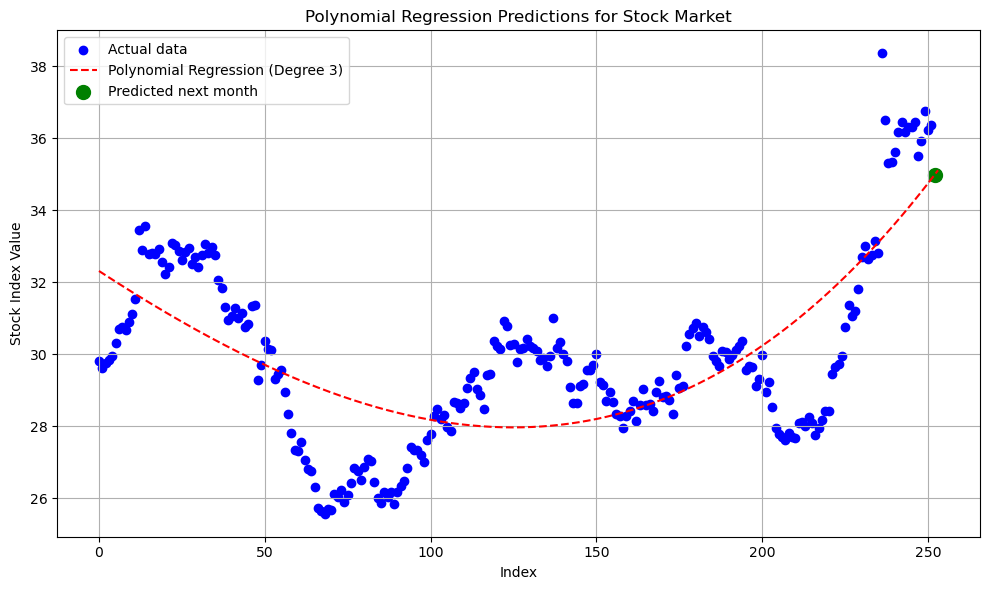

In [22]:

X_plot = np.linspace(0, len(X) + 1, 1000).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)

predictions = model.predict(X_plot_poly)


plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X_plot, predictions, color='red', linestyle='--', label=f'Polynomial Regression (Degree {degree})')
plt.scatter(next_month_index, next_month_prediction, color='green', marker='o', s=100, label='Predicted next month')

plt.title('Polynomial Regression Predictions for Stock Market')
plt.xlabel('Index')
plt.ylabel('Stock Index Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [23]:


from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt



In [58]:

df = pd.read_csv('HPQ.csv')


df['Market_Direction'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


df.dropna(inplace=True)

X = np.array(df['Close']).reshape(-1, 1)
y = df['Market_Direction']


In [59]:

model = LogisticRegression()


model.fit(X, y)


LogisticRegression()

Predicted probability for market going up next month: 0.5351417945719663


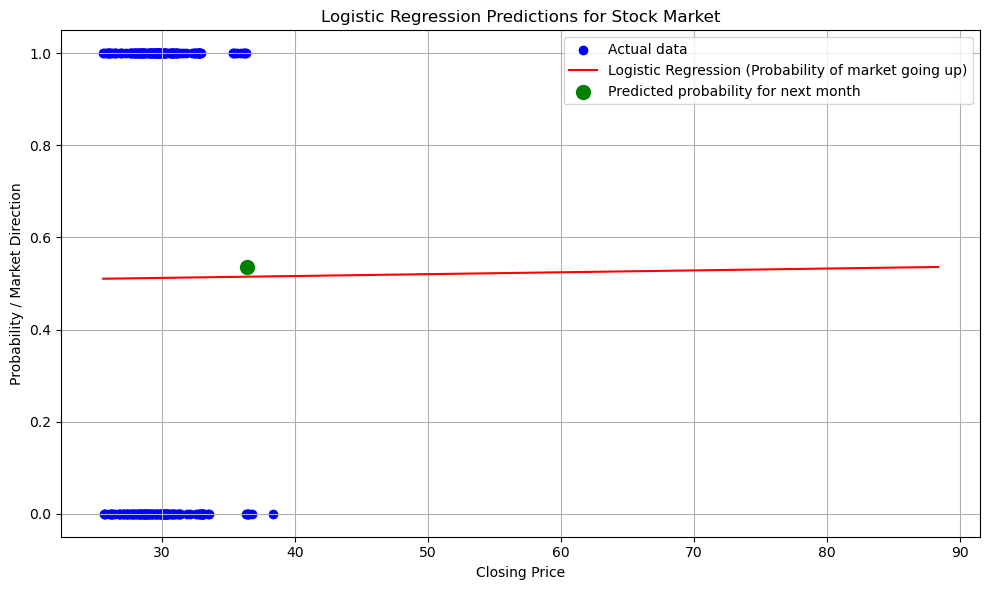

In [60]:

X_plot = np.linspace(np.min(X), np.max(X) + 50, 100).reshape(-1, 1)


probabilities = model.predict_proba(X_plot)[:, 1] 

last_close_price = X[-1][0]
next_month_probability = model.predict_proba([[last_close_price + 50]])[:, 1]

print(f"Predicted probability for market going up next month: {next_month_probability[0]}")


plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X_plot, probabilities, color='red', label='Logistic Regression (Probability of market going up)')
plt.scatter([last_close_price], [next_month_probability], color='green', marker='o', s=100, label='Predicted probability for next month')

plt.title('Logistic Regression Predictions for Stock Market')
plt.xlabel('Closing Price')
plt.ylabel('Probability / Market Direction')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
